### Quiero ver la distribución de radios de voids en cada archivo que me mandó el Polaco
### La idea es saber en qué radio conviene hacer el cutoff en cada caso

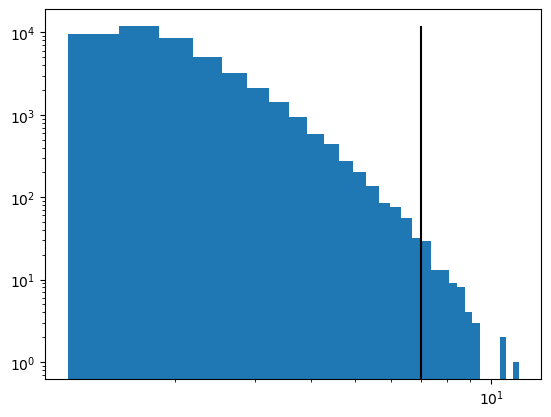

In [7]:
#import numpy as np
#from scipy import spatial
from astropy.io import ascii
import matplotlib.pyplot as plt

voids = ascii.read('../data/tng300-1_voids.dat',\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])

plt.hist(voids['r'],bins=30)
plt.vlines(7,0,12000,color='k')
plt.xscale('log')
plt.yscale('log')
plt.show()

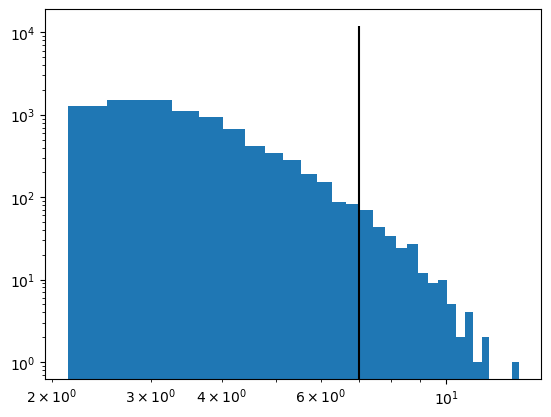

In [9]:
#import numpy as np
#from scipy import spatial
from astropy.io import ascii
import matplotlib.pyplot as plt

voids = ascii.read('../data/voids_1e10.dat',\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])

plt.hist(voids['r'],bins=30)
plt.vlines(7,0,12000,color='k')
plt.xscale('log')
plt.yscale('log')
plt.show()

7 4.791061597026542 9.388058948483637 19.802658920969762


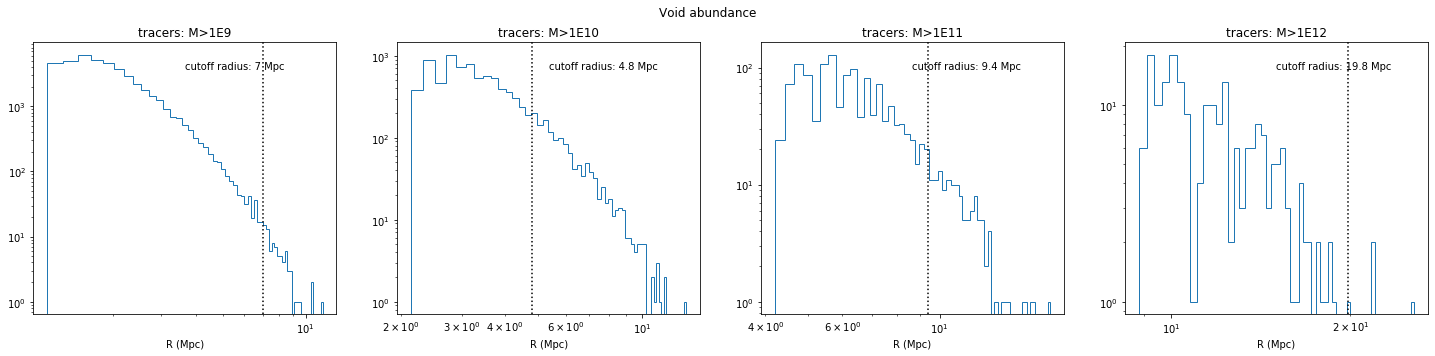

In [16]:
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25,5))
fig.suptitle('Void abundance')

voidfiles = ['../data/voids_1e9.dat',\
             '../data/voids_1e10.dat',\
                '../data/voids_1e11.dat',\
                    '../data/voids_1e12.dat']

for voidfile, ax in zip(voidfiles,[ax1,ax2,ax3,ax4]):
    voids = ascii.read(voidfile,\
        names=['r','x','y','z','vx','vy','vz',\
            'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
    
    ax.hist(voids['r'],histtype='step',bins=60)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('R (Mpc)')

msep10 = 1.5970205323421807 #Mean interparticle separation for gxs with 1E10 min cutoff
msep11 = 3.129352982827879
msep12 = 6.600886306989921 

mult = 3
cutoff10 = msep10*mult
cutoff11 = msep11*mult
cutoff12 = msep12*mult
print('7',cutoff10,cutoff11,cutoff12)

ax1.axvline(7,color='k',ls=':')
ax2.axvline(cutoff10,color='k',ls=':')
ax3.axvline(cutoff11,color='k',ls=':')
ax4.axvline(cutoff12,color='k',ls=':')

ax1.text(.5,.9,'cutoff radius: 7 Mpc',transform=ax1.transAxes)
ax2.text(.5,.9,f'cutoff radius: {cutoff10:.1f} Mpc',transform=ax2.transAxes)
ax3.text(.5,.9,f'cutoff radius: {cutoff11:.1f} Mpc',transform=ax3.transAxes)
ax4.text(.5,.9,f'cutoff radius: {cutoff12:.1f} Mpc',transform=ax4.transAxes)


ax1.set_title('tracers: M>1E9')
ax2.set_title('tracers: M>1E10')
ax3.set_title('tracers: M>1E11')
ax4.set_title('tracers: M>1E12')

plt.show()



#### Haciendo un 'wc ../data/voids_1e9.dat ../data/tng300-1_voids.dat' me sale que tienen distinta cantidad de voids, no deberían ser los mismos?

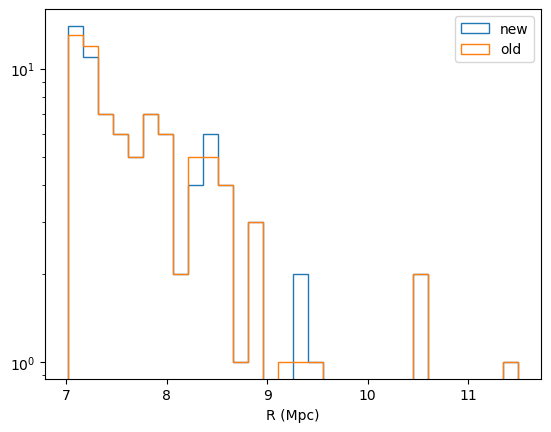

In [28]:
voids = ascii.read('../data/voids_1e9.dat',\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
voids = voids[voids['r']>=7.]

voids_old = ascii.read('../data/tng300-1_voids.dat',\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
voids_old = voids_old[voids_old['r']>=7.]

plt.hist(voids['r'],bins=30,histtype='step',label='new')
plt.hist(voids_old['r'],bins=30,histtype='step',label='old')

#plt.axvline(7,color='k')
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('R (Mpc)')
plt.show()